In [2]:
import numpy as np
from matplotlib import pyplot as plt

<img src="images/Q1.1.png" style="width:100px;height:50px;" align="left">

**(a) The matrix form of least squares solution (as given in slide#31 of week 1 slides):<br><br>**

$\textbf{w} = (\textbf{X}^\textbf{T}\textbf{X})^{-1}\textbf{X}^T\textbf{y}$

In [226]:
# The (x, y) values are: (1, 3), (2, 2), (3, 0), (4, 5),
# so x values are: 1, 2, 3, 4.
def build_basis_up_to_k_4(input_x: list) -> list:
    """
    Build the 4 polynomial function input values for the independent variable x, for each of the 4 basis variable from k=1 to k=4.
    :param input_x: The given independent variable values.
    :return: Four polynomial input values for k=1, k=2, k=3, k=4.
    """
    X_1 = np.ones((len(input_x), 1)) # k=1 gives x^0, so filled with 1s. This is the bias term (i.e. y-intercept).
    X_2 = np.array(input_x).reshape(-1, 1) # k=2
    X_2 = np.column_stack((X_1, X_2))
    X_3 = np.array([x**2 for x in input_x]).reshape(-1, 1) # k=3
    X_3 = np.column_stack((X_2, X_3))
    X_4 = np.array([x**3 for x in input_x]).reshape(-1, 1) # k=4
    X_4 = np.column_stack((X_3, X_4))
    return [X_1, X_2, X_3, X_4]

def compute_weights_of_lin_reg_by_least_squares(X_inputs: list) -> list:
    """
    Calculate the coefficients (aka weights) for the given input X values.
    :param X_inputs: All four X inputs for k=1, k=2, k=3, k=4
    :return:
    """
    weights = []
    for X in X_inputs:
        X_t = X.T
        y = np.array([3, 2, 0, 5]).reshape(-1, 1)
        w = np.linalg.inv(X_t @ X) @ X_t @ y
        weights.append(w.flatten())
    return weights

def predict_with_polynomial_func(weights: list) -> list:
    """
    Calculate the predicted values of y using the polynomial for each of the 4 bases.
    :param weights: Weights calculated for all 4 bases.
    :return: Predicted y values for all 4 bases.
    """
    y_preds = []
    for w in weights:
        # numpy's poly1d() expects x^n + .. + x^1 + x^0, so I need to reverse the order of w_T
        w_T = w.T
        w_T_for_np = np.flip(w_T).flatten()
        # Evaluate polynomial for a range of x values within limits of plot shown in Figure 1 (i.e. from x = 0 to about x=5)
        x_for_pred = np.linspace(0, 5, 100)
        y_pred = np.poly1d(w_T_for_np)(x_for_pred)
        y_preds.append(y_pred)
    return y_preds

def plot(x, y, y_preds: list) -> None:
    """
    :param x: The independent variable (input)
    :param y: The dependent variable (aka label)
    :param y_preds: Predicted values of y for each of the four k values.
    """
    _ , ax = plt.subplots(facecolor='white')
    ax.set_xlim(0, 5)
    ax.set_ylim(-4, 8)
    ax.scatter(x, y, color='red')
    x_for_plot = np.linspace(0, 5, 100)
    for y_pred, k in zip(y_preds, [1,2,3,4]):
        ax.plot(x_for_plot, y_pred, label=f'k={k}')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend()
    plt.show()

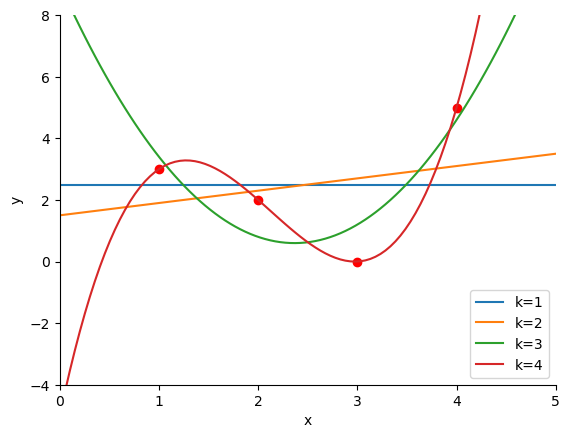

In [227]:
# Running all my python functions:
input_x = [1, 2, 3, 4]
Xs = build_basis_up_to_k_4(input_x)
weights = compute_weights_of_lin_reg_by_least_squares(Xs)
y_preds = predict_with_polynomial_func(weights)
plot(x=input_x, y=[3, 2, 0, 5], y_preds=y_preds)

**(b) Printing out the `weights` variable from part (a) gives:**

In [233]:
weights

[array([2.5]),
 array([1.5, 0.4]),
 array([ 9. , -7.1,  1.5]),
 array([-5.        , 15.16666667, -8.5       ,  1.33333333])]

In [236]:
w_k1 = weights[0]
w_k2 = weights[1]
w_k3 = weights[2]
k1_x0 = float(w_k1[0])
print(f'k1_x0={k1_x0}')
k2_x0 = float(w_k2[0])
k2_x1 = float(w_k2[1])
print(f'k2_x0={k2_x0}, k2_x1={k2_x1}')
k3_x0 = float(w_k3[0])
k3_x1 = float(w_k3[1])
k3_x2 = float(w_k3[2])
print(f'k3_x0={k3_x0}, k3_x1={k3_x1}, k3_x2={k3_x2}')

k1_x0=2.5
k2_x0=1.5, k2_x1=0.40000000000000036
k3_x0=8.999999999999694, k3_x1=-7.099999999999758, k3_x2=1.499999999999956


This indicates that the equation for:<br>
$k=1$  is $y = 2.5$, <br>
$k=2$  is $y = 1.5 + 0.4x$, <br>
$k=3$  is $y = 9 - 7.1x + 1.5x^2$.<br>

**(c) (From slide#27 in week 1 slides) <br>In matrix notation, the empirical mean square error of the linear predictor** $\hat{y}=\textbf{w}.\textbf{x}$ **on a data sequence** $\textit{S}$ **is**:<br>
$\frac{1}{m}(X\textbf{w} - \textbf{y})^\intercal X\textbf{w} - \textbf{y}$ <br>

In this case, there are 4 data samples, so $m = 4$


In [269]:
y = [3, 2, 0, 5]
m = 4

X_k1 = Xs[0]
w_k1 = weights[0]
k1_MSE = (1 / m) * (X_k1 @ w_k1 - y).T @ (X_k1 @ w_k1 - y)

X_k2 = Xs[1]
w_k2 = weights[1]
k2_MSE = (1 / m) * (X_k2 @ w_k2 - y).T @ (X_k2 @ w_k2 - y)

X_k3 = Xs[2]
w_k3 = weights[2]
k3_MSE = (1 / m) * (X_k3 @ w_k3 - y).T @ (X_k3 @ w_k3 - y)

X_k4 = Xs[3]
w_k4 = weights[3]
k4_MSE = (1 / m) *  (X_k4 @ w_k4 - y).T @ (X_k4 @ w_k4 - y)

Thus, for each fitted curve k = 1, 2, 3, 4 the mean squared error is:

In [276]:
print(f'k=1 MSE = {k1_MSE}')
print(f'k=2 MSE = {k2_MSE}')
print(f'k=3 MSE = {k3_MSE}')
print(f'k=4 MSE = {k4_MSE}')

k=1 MSE = 3.25
k=2 MSE = 3.05
k=3 MSE = 0.800000000000001
k=4 MSE = 3.4942940895563015e-23
